In [4]:
from testsCBS import test_cbs_on_map
from time import time
from map import Map
from work_with_file import read_task_from_file

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


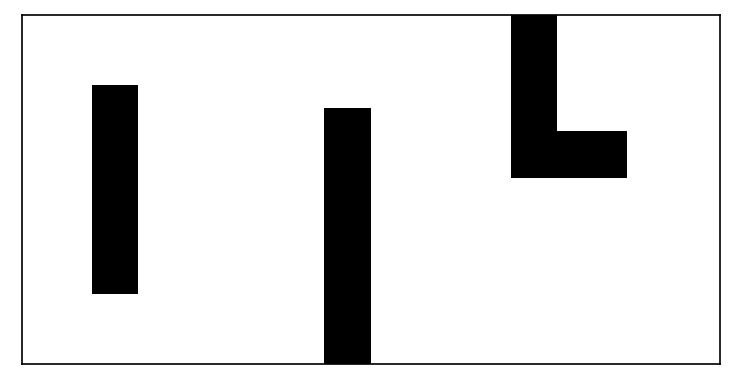

COST:  14
[0 0 0, 1 0 1, 1 1 2, 1 2 3, 2 2 4]
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6 1 6, 7 1 7, 8 1 8, 9 1 9, 10 1 10]


In [9]:
test_cbs_on_map(0, 0, show_debug=False, show_all_solution=False, show_path=True, show_cost=True, draw_test_map=True)

In [24]:
test = Map()

In [25]:
read_task_from_file("../CBS-with-heuristics/instances/exp1.txt")

(7,
 4,
 [[1, 1, 1, 1, 1, 1, 1],
  [1, 0, 0, 0, 0, 0, 1],
  [1, 1, 1, 0, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1]],
 [(1, 1), (1, 2)],
 [(1, 5), (1, 4)])

In [10]:
# test_cbs_on_map(0, 7, show_debug=False, show_all_solution=False)
def test_all(map_number, test_number):
    print("===============================")
    print("TEST on ", map_number, " test number ", test_number)
    t0 = time()
    %time res = test_cbs_on_map(map_number, test_number, show_debug=False, show_all_solution=False, show_path=True, show_cost=True)
    t1 = time()
    print("CBS: ", t1 - t0)
    t0 = time()
    %time res = test_cbs_on_map(map_number, test_number, isCBS_CP=True, show_debug=False, show_all_solution=False, show_path=True, show_cost=True)
    t1 = time()
    print("CBS_PC: ", t1 - t0)
    t0 = time()
    %time res = test_cbs_on_map(map_number, test_number, isCBSH=True, show_debug=False, show_all_solution=False, show_path=True, show_cost=True)
    t1 = time()
    print("CBSH: ", t1 - t0)
    print("===============================")

In [8]:
t0 = time()
%time res = test_cbs_on_map(0, 2, isCBSH=True, show_debug=False, show_all_solution=False, show_path=True, show_cost=True)
t1 = time()
print("CBSH: ", t1 - t0)

COST:  19
[0 0 0, 0 1 1, 0 2 2, 1 2 3, 2 2 4]
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6 1 6, 7 1 7, 8 1 8, 9 1 9, 10 1 10]
[1 0 0, 1 0 1, 1 1 2, 1 1 3, 1 2 4, 1 3 5]
CPU times: user 15.7 ms, sys: 377 µs, total: 16.1 ms
Wall time: 15.7 ms
CBSH:  0.0161588191986084


In [11]:
for i in range(9):
    test_all(0,i)

TEST on  0  test number  0
COST:  14
[0 0 0, 1 0 1, 2 0 2, 2 1 3, 2 2 4]
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6 1 6, 7 1 7, 8 1 8, 9 1 9, 10 1 10]
CPU times: user 876 µs, sys: 58 µs, total: 934 µs
Wall time: 904 µs
CBS:  0.0013189315795898438
COST:  14
[0 0 0, 0 1 1, 1 1 2, 1 2 3, 2 2 4]
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6 1 6, 7 1 7, 8 1 8, 9 1 9, 10 1 10]
CPU times: user 889 µs, sys: 73 µs, total: 962 µs
Wall time: 901 µs
CBS_PC:  0.0012102127075195312
COST:  14
[0 0 0, 0 1 1, 1 1 2, 1 2 3, 2 2 4]
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6 1 6, 7 1 7, 8 1 8, 9 1 9, 10 1 10]
CPU times: user 937 µs, sys: 98 µs, total: 1.04 ms
Wall time: 1 ms
CBSH:  0.0013740062713623047
TEST on  0  test number  1
COST:  14
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6 1 6, 7 1 7, 8 1 8, 9 1 9, 10 1 10]
[0 0 0, 1 0 1, 2 0 2, 2 1 3, 2 2 4]
CPU times: user 704 µs, sys: 132 µs, total: 836 µs
Wall time: 705 µs
CBS:  0.0010509490966796875
COST:  14
[0 1 0, 1 1 1, 2 1 2, 3 1 3, 4 1 4, 5 1 5, 6

COST:  56
[0 0 0, 1 0 1, 1 1 2, 1 2 3, 1 3 4, 1 4 5, 1 5 6, 1 6 7, 1 7 8, 0 7 9, 0 8 10, 0 9 11, 0 10 12]
[0 1 0, 0 0 1, 1 0 2, 2 0 3, 3 0 4, 4 0 5, 5 0 6, 6 0 7, 7 0 8, 8 0 9, 9 0 10, 10 0 11]
[1 0 0, 1 1 1, 1 2 2, 1 3 3, 1 4 4, 1 5 5, 1 6 6, 1 7 7, 1 8 8, 1 9 9, 1 10 10]
[1 1 0, 2 1 1, 3 1 2, 4 1 3, 5 1 4, 6 1 5, 7 1 6, 8 1 7, 9 1 8, 10 1 9]
[2 0 0, 2 0 1, 2 0 2, 2 1 3, 1 1 4]
[2 1 0, 2 2 1, 2 1 2, 1 1 3, 1 0 4]
[0 2 0, 0 3 1, 0 2 2, 0 1 3]
[1 2 0, 0 2 1, 0 1 2, 0 0 3]
CPU times: user 35.4 s, sys: 391 ms, total: 35.7 s
Wall time: 35.7 s
CBSH:  35.74679207801819


In [ ]:
v_1 = ""

In [77]:


st = ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ."

In [78]:
st = st.replace(" ", "")

In [79]:
s = []
j = -1
print(len(st))
for i in range(len(st)):
    if i %34 == 0:
        j += 1
        s.append([])
    s[j].append(st[i])

1122


In [80]:
for i in range(33):
    print(" ".join(s[i]))

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .
. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .
. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . . .
. . . . . @ @ @ @ @ @ . . . @ @ @ @ @ @ . . . @ 

In [81]:
from random import randint

In [84]:
starts = []
goals = []
# const = 12
w = 34
h = 33
count = 4
for const in range(2, 13):
    for _ in range(count):
        print(const)
        for i in range(const):
            a,b = randint(0, w - 1), randint (0, h - 1)
            c, d = randint(0, w - 1), randint (0, h - 1)
            while s[b][a] == "@" or (b, a) in starts:
                a,b = randint(0, w - 1), randint (0, h - 1)

            while s[d][c] == "@" or (d == b and a == c) or (d, c) in goals:
                c, d = randint(0, w - 1), randint (0, h - 1)

            starts.append((b, a))
            goals.append((d, c))

        for i in range(const):
            print(starts[i][0], starts[i][1], goals[i][0], goals[i][1])
        print()

2
30 7 21 15
27 13 16 12

2
30 7 21 15
27 13 16 12

2
30 7 21 15
27 13 16 12

2
30 7 21 15
27 13 16 12

3
30 7 21 15
27 13 16 12
22 18 10 20

3
30 7 21 15
27 13 16 12
22 18 10 20

3
30 7 21 15
27 13 16 12
22 18 10 20

3
30 7 21 15
27 13 16 12
22 18 10 20

4
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2

4
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2

4
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2

4
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2

5
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15

5
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15

5
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15

5
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15

6
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15
18 1 5 10

6
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15
18 1 5 10

6
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15
18 1 5 10

6
30 7 21 15
27 13 16 12
22 18 10 20
16 18 22 2
28 32 6 15
18 1 5 10

7
30 7 21 15
27 13 16 12
22 

In [85]:
for i in range(const):
    print(s[starts[i][0]][starts[i][1]], s[goals[i][0]][goals[i][1]])

. .
. .
. .
. .
. .
. .
. .
. .
. .
. .
. .
. .
